# Uloha 3

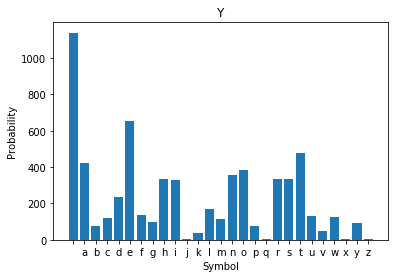

In [78]:
import scipy.stats as st
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter

with open('014.txt') as f:
    Y_title, Y_data = f.readlines()
    
with open('016.txt') as f:
    X_title, X_data = f.readlines()
    
Y_length = len(Y_data)
X_length = len(X_data)

def plot(symbols, probability, name):
    xpos = range(len(symbols))
    plt.bar(xpos, probability)
    plt.xticks(xpos, symbols)
    plt.xlabel('Symbol')
    plt.ylabel('Probability')
    plt.title(name)
    plt.show()

Y_abs_fr = Counter(Y_data)
X_abs_fr = Counter(X_data)

symbols, counts = zip(*sorted(Y_abs_fr.items()))
plot(symbols, counts, 'Y')

Jako prvni text volime 014.txt.

### Za předpokladu výše odhadněte matici přechodu markovského řetězce pro první text. Pro odhad matice přechodu vizte přednášku 17. Odhadnuté pravděpodobnosti přechodu vhodně graficky znázorněte, např. použitím heatmapy.

Predpokladame, ze text je vygenerovan z homogenniho markovskeho retezce s diskretnim casem. Z toho plyne, ze jednotlive znaky jsou stavy retezce. V case 0 retezec zacina se na prvni znak a v case $i-1$ mame znak $i$. Pravdepodobnost prechodu mezi stavy zohlednuje matice prechodu $P$, kterou musime odhadnout. Matice bude 27x27 - rozmerna, protoze mame celkem 27 znaku.

In [79]:
 def get_code(char):
    if char == ' ': # 0 pro mezeru
        return 0
    return ord(char) - ord('a') + 1

Matice prechodu spocitame pomoci formule $P{ij} = \frac{n{ij}}{n_{i\bullet}}$, kde $n_{ij}$ je pocet prechodu znaku z $i$ do $j$ a $n_{i\bullet}=\sum_{j\in S} n_{ij}$. Vytvoríme nejdriv matice poctu prechodu $n_{ij}$. Dal, hodnoty v matici vydelime souctem v jednotlivych radcich a tim dostaneme vyslednou matice  $P$.

In [80]:
P = np.zeros((len(symbols), len(symbols)))
for i in range(Y_length - 1):
    P[get_code(Y_data[i]), get_code(Y_data[i + 1])] += 1
    
P /= P.sum(1)[:, None]

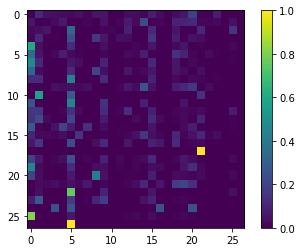

In [81]:
plt.imshow(P)
plt.colorbar()
plt.show()

### Na základě matice z předchozího bodu najděte stacionární rozdělení $\pi$ tohoto řetězce pro první text.

Pro stacionarni rozdeleni $\pi$ plati $\pi \mathbf{P} = \pi$. Plati $1\pi^T = (\pi \mathbf{P})^T = \mathbf{P}^T\pi^T$. Z toho muzeme odvodit, ze $\pi^T$ je vlastním vektorem vlastního čísla $1$ matice $\mathbf{P}^T$.Musime prozkoumat, jestli $\mathbf{P}^T$ ma vlastni cislo $1$, jelikoz mame jenom odhad. Pokud ma pak pro odhad $\pi$, platí $\pi = v_1^T / \sum_i {v_1}_i$, kde $v_1$ je normovany vlastni vektor prislusni vlastnimu cislu $1$ matice $P^T$. To deleni mame pro zachovani invariantu. Vypocet vlastnich cisel je velmi casto doprovazen chybama, proto hledame cislo, ktere bude velmi blizko k 1.

In [82]:
eival, eivec = np.linalg.eig(P.T)
eival[0], eivec[:, 0]

((0.9999999999999987+0j),
 array([-0.6526813 +0.j, -0.24291592+0.j, -0.04408751+0.j, -0.06932618+0.j,
        -0.1352002 +0.j, -0.37342644+0.j, -0.07676693+0.j, -0.05614259+0.j,
        -0.19314414+0.j, -0.18794248+0.j, -0.00400314+0.j, -0.02005623+0.j,
        -0.09733632+0.j, -0.06474557+0.j, -0.20394838+0.j, -0.22110816+0.j,
        -0.04355823+0.j, -0.00229154+0.j, -0.19187469+0.j, -0.19136943+0.j,
        -0.2727982 +0.j, -0.07613947+0.j, -0.0286428 +0.j, -0.0716258 +0.j,
        -0.00229147+0.j, -0.05261323+0.j, -0.00114564+0.j]))

In [83]:
np.isclose(eival[0], 1)

True

Mame vlastni cislo blizke k 1. Takze mame ted i vhodneho kandidata na stacionarne rozdeleni. Overime kvalitu odhadu pomoci hodnoty $\varepsilon = ||\pi - \pi P^{6245}||$, kde 6245 jedelkou textu, takze $\varepsilon$ vyjadruje odchylku na konci textu. Tim dostaneme horni odhad chyby. Pro realnou hodnotu chyba musi byt rovna $0$.

In [127]:
pi = np.real(eivec[:, 0])
pi /= np.sum(pi)
e = np.linalg.norm(pi - pi @ np.linalg.matrix_power(P, Y_length))
e

5.645628886889562e-15

$\varepsilon_{\pi} \approx 5.6\cdot10^{-15}$, coz je velmi mala odhylka a teda predpokladam, ze odhat je $P$ je kvalitni. Pro jistotu jeste to overime:

In [85]:
np.isclose(e, 0)

True

### Porovnejte rozdělení znaků druhého textu se stacionárním rozdělením $\pi$, tj. na hladině významnosti 5 % otestujte hypotézu, že rozdělení znaků druhého testu se rovná rozdělení $\pi$ z předchozího bodu.

Testujeme, jestli se rozdeleni znaku druheho textu se rovna $\pi$ na hladine vyznamnosti 5%. Budeme pouzivat test se znamymi parametry.

$H_0$ Rozdělení znaků se rovná rozdělení π.

$H_A$ Rozdělení znaků se nerovná rozdělení π.

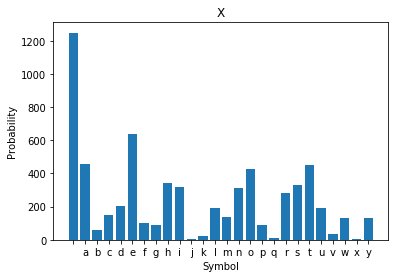

In [128]:
X_symbols, X_counts = zip(*sorted(X_abs_fr.items()))

plot(X_symbols, X_counts, 'X')

In [134]:
X_chars_count = list(X_counts) + [0] # nevyskytuje v textu pismeno z, proto muzeme pridat 0 na konci
expected = list(len(X_data) * pi)
# Sjednotime symboly s malou cetnosti nebo 0.
X_chars_count.append(X_chars_count.pop(26) + X_chars_count.pop(24) + X_chars_count.pop(17) + X_chars_count.pop(10))
expected.append(expected.pop(26) + expected.pop(24) + expected.pop(17) + expected.pop(10))
st.chisquare(X_chars_count, expected)

Power_divergenceResult(statistic=115.69404742720415, pvalue=2.4594438205530652e-14)

Test vratil velmi malou p-hodnotu, mnohem je mensi, nez 5%. Proto, na hladine spolehlivosti 5%, hypotezu $H_0$ zamitam ve prospech $H_A$.